In [1]:
# Use Autoencoder to implement anomaly detection. Build the model by using:
# a. Import required libraries
# b. Upload / access the dataset
# c. Encoder converts it into latent representation
# d. Decoder networks convert it back to the original input
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [1]:
# a. Import required libraries

import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/Acer/Downloads/dataset/ecg-csv/ecg.csv", header=None)


In [3]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0
4997,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,-0.733839,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,0.0


In [4]:
scaler = StandardScaler()

x = scaler.fit_transform(df.drop(140, axis = 1))
y = df[140]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
input_dem = x_train.shape[1]
print(input_dem)

140


In [7]:
# c. Encoder converts it into latent representation

encoder = keras.Sequential([
    keras.Input(shape= input_dem),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu')
])

In [8]:
# d. Decoder networks convert it back to the original input

decoder = keras.Sequential([
    keras.layers.Input(shape = (16,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(input_dem, activation='linear')
])

In [9]:
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics

model = keras.Sequential([
    encoder,
    decoder
])

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
118/118 [==============================] - 1s 5ms/step - loss: 0.1618 - val_loss: 0.0210
Epoch 2/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0135
Epoch 3/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 4/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0086
Epoch 5/5
118/118 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.0090


In [11]:
y_predict = model.predict(x_test)

40/40 [==============================] - 0s 2ms/step


In [12]:
import numpy as np

mse = np.mean(np.power(x_test - y_predict, 2), axis=1)
print(mse)

[2.45019628 1.4045811  1.85204021 ... 2.39067389 0.5198191  2.16683158]


In [18]:
# Threshold tuning (iterate and adjust as needed)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
anomalies = mse > threshold
    



In [19]:
# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 3.3, Number of anomalies: 63


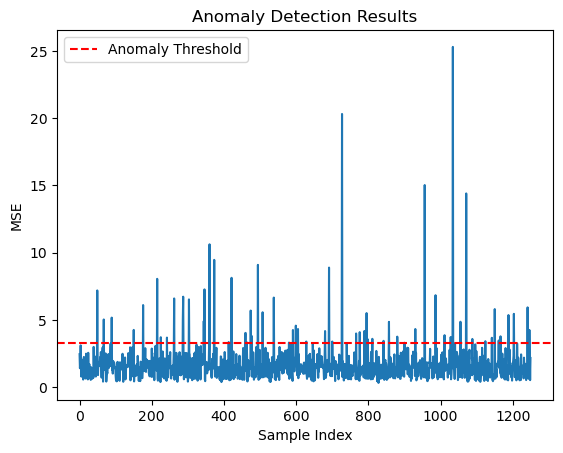

In [22]:
# Plot the anomalies
plt.figure()
plt.plot(mse)
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and anomalies are your true labels and predicted labels
confusion = confusion_matrix(y_test, anomalies)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[499  25]
 [688  38]]


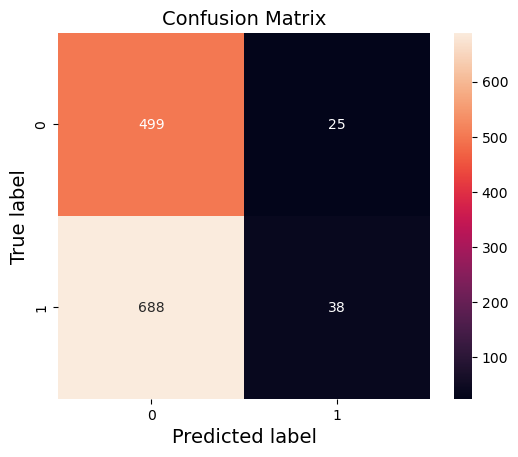

In [21]:
import seaborn as sns
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()